In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt
from numpy import log
from matplotlib import pyplot
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [3]:
data.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Delivery_Time,0.352390,0.317960
Sorting_Time,0.047115,-1.148455


# Visualization for Delivery Time

In [4]:
data['Delivery_Time'].describe()

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery_Time, dtype: float64

<AxesSubplot:>

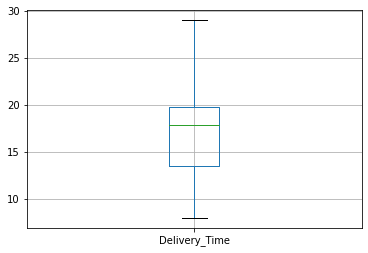

In [5]:
data.boxplot(column= ['Delivery_Time'])

C:\Users\uniha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

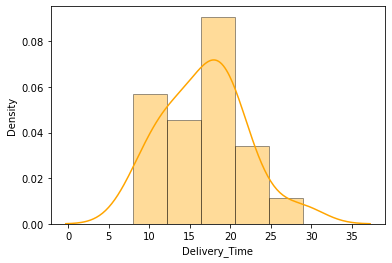

In [6]:
import seaborn as sns
sns.distplot(data['Delivery_Time'], color='orange',hist_kws =dict(edgecolor = 'black'))

# Log and sq transformation for Delivery Time

In [7]:
#create log-transformed data
data_log1 = np.log(data['Delivery_Time'])

Text(0.5, 1.0, 'Log-Transformed Delivery Time')

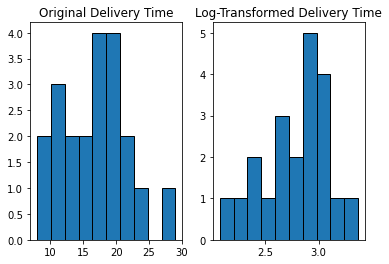

In [8]:
#define grid of plots
fig, axs_log1 = plt.subplots(nrows=1, ncols=2)

#create histograms
axs_log1[0].hist(data['Delivery_Time'], edgecolor='black')
axs_log1[1].hist(data_log1, edgecolor='black')

#add title to each histogram
axs_log1[0].set_title('Original Delivery Time')
axs_log1[1].set_title('Log-Transformed Delivery Time')

In [9]:
data_sqrt1 = np.sqrt(data['Delivery_Time'])

Text(0.5, 1.0, 'Square Root Transformed Delivery Timee')

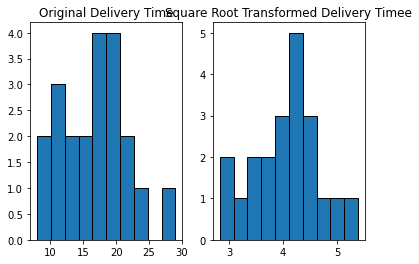

In [10]:
#define grid of plots
fig, axs_sq1 = plt.subplots(nrows=1, ncols=2)

#create histograms
axs_sq1[0].hist(data['Delivery_Time'], edgecolor='black')
axs_sq1[1].hist(data_sqrt1, edgecolor='black')

#add title to each histogram
axs_sq1[0].set_title('Original Delivery Time')
axs_sq1[1].set_title('Square Root Transformed Delivery Timee')

# Visualization for Sorting Time

In [11]:
data['Sorting_Time'].describe()

count    21.000000
mean      6.190476
std       2.542028
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: Sorting_Time, dtype: float64

C:\Users\uniha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

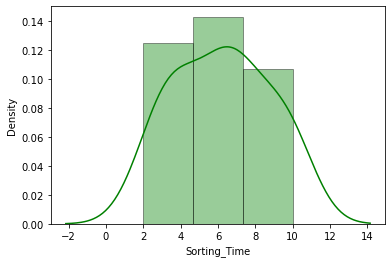

In [12]:
sns.distplot(data['Sorting_Time'], color='green',hist_kws =dict(edgecolor = 'black'))

<AxesSubplot:>

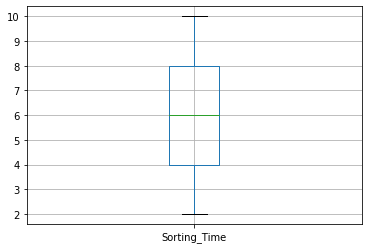

In [13]:
data.boxplot(column= ['Sorting_Time'])

No outliers in the given data

# Log and sq transformation for Sorting Time

In [14]:
#create log-transformed data
data_log2 = np.log(data['Sorting_Time'])

Text(0.5, 1.0, 'Log-Transformed Sorting Time')

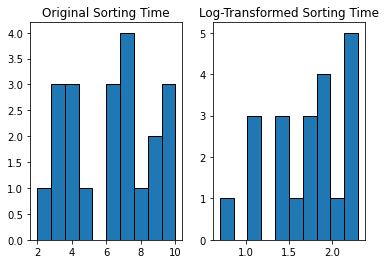

In [15]:
#define grid of plots
fig, axs_log2 = plt.subplots(nrows=1, ncols=2)

#create histograms
axs_log2[0].hist(data['Sorting_Time'], edgecolor='black')
axs_log2[1].hist(data_log2, edgecolor='black')

#add title to each histogram
axs_log2[0].set_title('Original Sorting Time')
axs_log2[1].set_title('Log-Transformed Sorting Time')

In [16]:
data_sqrt2 = np.sqrt(data['Sorting_Time'])

Text(0.5, 1.0, 'Square Root Transformed Sorting Time')

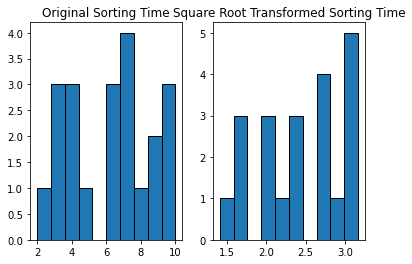

In [17]:
#define grid of plots
fig, axs_sq2 = plt.subplots(nrows=1, ncols=2)

#create histograms
axs_sq2[0].hist(data['Sorting_Time'], edgecolor='black')
axs_sq2[1].hist(data_sqrt2, edgecolor='black')

#add title to each histogram
axs_sq2[0].set_title('Original Sorting Time')
axs_sq2[1].set_title('Square Root Transformed Sorting Time')

# Correlation

Text(0, 0.5, 'Sorting Time')

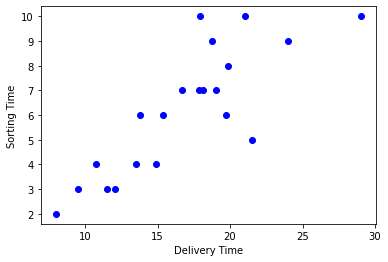

In [18]:
plt.plot(data.Delivery_Time,data.Sorting_Time,"bo");plt.xlabel("Delivery Time");plt.ylabel("Sorting Time")

In [19]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


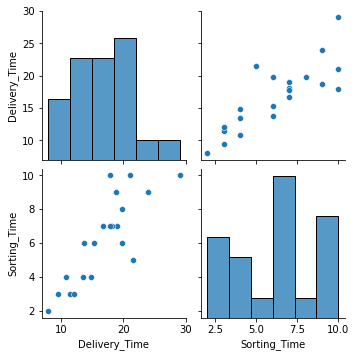

In [20]:
sns.pairplot(data)

# Fitting the model

In [21]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time",data = data).fit()

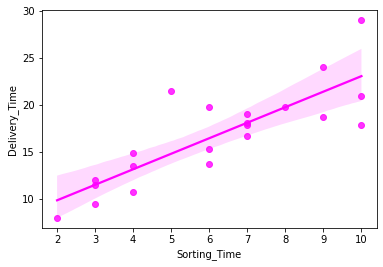

In [22]:
sns.regplot(x="Sorting_Time", y="Delivery_Time", data=data, color= 'magenta');

In [23]:
#Coefficients
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [24]:
#Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           3.98e-06
Time:                        22:04:25   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [26]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

R squared value = 0.68, good model

# Prediction 1

In [27]:
#Predict for 11 and 12 daily circulation
newdata1=pd.Series([11,12])

In [28]:
data_pred1=pd.DataFrame(newdata1,columns=['Sorting_Time'])

In [29]:
pred1 = model.predict(data_pred1)
pred1

0    24.721953
1    26.370973
dtype: float64

ValueError: x and y must have same first dimension, but have shapes (21,) and (2,)

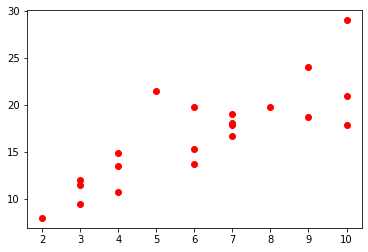

In [30]:
plt.scatter(x=data['Sorting_Time'],y=data['Delivery_Time'],color='red');plt.plot(data['Sorting_Time'],pred1,color='black')

# Prediction 2

In [31]:
#Predict for 16 and 17 daily circulation
newdata2=pd.Series([16,17])

In [32]:
data_pred2=pd.DataFrame(newdata2,columns=['Sorting_Time'])

In [33]:
pred2 = model.predict(data_pred1)
pred2

0    24.721953
1    26.370973
dtype: float64

ValueError: x and y must have same first dimension, but have shapes (21,) and (2,)

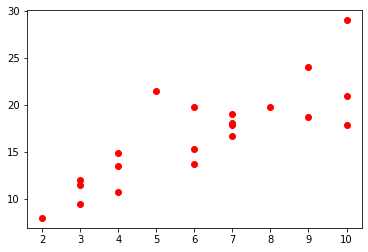

In [34]:
plt.scatter(x=data['Sorting_Time'],y=data['Delivery_Time'],color='red');plt.plot(data['Sorting_Time'],pred2,color='black')

# Prediction for multiple values

In [35]:
newdata=pd.Series([1,2.2,1.5,2,3,4,1.3,2.4,0.9,0.5,9,3.3,3])

In [36]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_Time'])

In [37]:
pred = model.predict(data_pred)
pred

0      8.231754
1     10.210578
2      9.056264
3      9.880774
4     11.529794
5     13.178814
6      8.726460
7     10.540382
8      8.066852
9      7.407244
10    21.423913
11    12.024500
12    11.529794
dtype: float64

ValueError: x and y must have same first dimension, but have shapes (21,) and (13,)

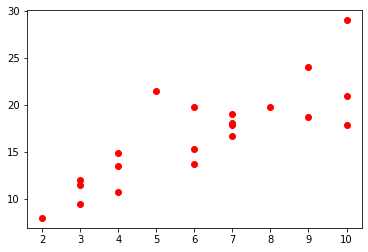

In [38]:
plt.scatter(x=data['Sorting_Time'],y=data['Delivery_Time'],color='red');plt.plot(data['Sorting_Time'],pred,color='black')

(array([1., 0., 6., 2., 6., 2., 1., 1., 0., 2.]),
 array([-1.76255624, -1.3589621 , -0.95536797, -0.55177383, -0.1481797 ,
         0.25541444,  0.65900857,  1.06260271,  1.46619685,  1.86979098,
         2.27338512]),
 <BarContainer object of 10 artists>)

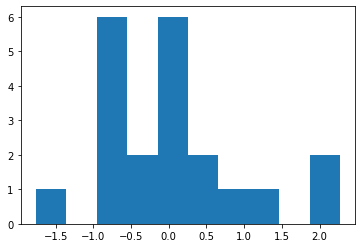

In [39]:
plt.hist(model.resid_pearson)